# 지하철 승하차 인원 분석

---

## 프로젝트 목표

- 승차 또는 하차 시 해당 시간, 해당 역의 승객 수를 확인하기 위해 **개찰구 통과 승객 수** 데이터와 **지하철 위치좌표** 데이터를 활용
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

## 프로젝트 목차
1. **데이터 읽기:** 승하차 인원 정보 데이터를 불러오고 DataFrame 구조를 확인<br>
    1.1. 데이터 불러오기<br>
    1.2. 데이터 확인하기<br>
<br>
2. **데이터 정제:** 데이터 확인 후 형 변환 및 이상치 데이터 처리<br>
    2.1. 2021년 6월 승하차 인원만 추출<br>
<br>
3. **데이터 시각화:** 각 변수별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 총해 데이터 특성 파악<br>
    3.1. 호선 별 이용객 수 출력<br>
    3.2. 특정 호선에서 역별 평균 승하차 인원 데이터 추출<br>
    3.3. 평균 승하차 인원 수 내림차순으로 막대그래프 출력<br>
    3.4. 특정 호선의 혼잡 정도와 위치좌표 데이터 병합<br>
    3.5. 특정 호선의 혼잡 정도를 지도에 출력<br>

---

## 데이터 출처
- 서울시 지하철 호선별 역별 승하차 인원 정보 데이터: http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

## 프로젝트 개요

코로나 시국에 익숙해졌다고는 하지만 가끔 밖으로 나갈 때 사람 많은 곳은 피하고 싶은 생각에 어떤 장소를 피해야 하는지 알아보고 싶을 때가 있을 겁니다. 지하철 이용 승객 수를 확인해보면 혼잡도가 높은 지역을 확인해볼 수 있을 것 같습니다.

이번 프로젝트에서는 서울 열린 데이터 광장에서 제공하는 `서울시 지하철 호선별 역별 승하차 인원 정보` 데이터를 분석하고 `지하철 역 위치 좌표` 데이터를 활용해 특정 호선에서 어떤 역이 가장 혼잡한지 직관적으로 확인해봅시다.

---

## 1. 데이터 읽기

### 1-1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

os.listdir('./data')

['.ipynb_checkpoints',
 '서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_20210705.csv',
 '지하철 역 위치 좌표.csv']

In [3]:
data = pd.read_csv('./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_20210705.csv', encoding='cp949')

In [4]:
data.head(5)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,...,8211,16,1434,1,1,0,0,0,0,20210703
1,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,...,2589,4,1348,0,0,0,0,0,0,20210703
2,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,...,8024,30,637,0,1,0,0,0,0,20210703
3,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,...,1485,3,92,0,0,0,0,0,0,20210703
4,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,...,5451,10,449,0,0,0,0,0,0,20210703


In [5]:
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45338 entries, 0 to 45337
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           45338 non-null  int64 
 1   호선명           45338 non-null  object
 2   지하철역          45338 non-null  object
 3   04시-05시 승차인원  45338 non-null  int64 
 4   04시-05시 하차인원  45338 non-null  int64 
 5   05시-06시 승차인원  45338 non-null  int64 
 6   05시-06시 하차인원  45338 non-null  int64 
 7   06시-07시 승차인원  45338 non-null  int64 
 8   06시-07시 하차인원  45338 non-null  int64 
 9   07시-08시 승차인원  45338 non-null  int64 
 10  07시-08시 하차인원  45338 non-null  int64 
 11  08시-09시 승차인원  45338 non-null  int64 
 12  08시-09시 하차인원  45338 non-null  int64 
 13  09시-10시 승차인원  45338 non-null  int64 
 14  09시-10시 하차인원  45338 non-null  int64 
 15  10시-11시 승차인원  45338 non-null  int64 
 16  10시-11시 하차인원  45338 non-null  int64 
 17  11시-12시 승차인원  45338 non-null  int64 
 18  11시-12시 하차인원  45338 non-null  int64 
 19  12시-

In [7]:
df.describe()

,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
count,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,...,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,4.533800e+04
mean,201789.133420,195.769884,2.814372,5266.394393,1321.769619,10812.072103,7159.655675,28312.941616,16398.171556,32220.175813,...,10120.554347,718.597424,3059.353831,4.345538,101.568397,0.235057,1.311019,0.021218,0.080771,2.017977e+07
std,188.005965,640.567673,7.353834,6133.540866,1484.650563,10736.866604,7735.039079,29436.657331,21255.209779,34496.294761,...,11458.418950,1653.334992,3861.691102,38.603670,360.988184,17.528273,13.088337,0.782690,3.274180,1.875965e+04
min,201501.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.015121e+07
25%,201609.000000,3.000000,0.000000,1455.000000,384.000000,3417.000000,2335.000000,7953.250000,4594.250000,9748.000000,...,3000.000000,25.000000,644.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.016101e+07
50%,201805.000000,19.000000,0.000000,3447.500000,903.000000,7673.000000,4907.000000,19577.500000,9535.500000,22330.500000,...,6834.500000,207.000000,1868.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.018060e+07
75%,201912.000000,106.000000,2.000000,6760.000000,1669.000000,14584.750000,9143.750000,38308.500000,19343.500000,42794.750000,...,13143.000000,718.000000,4111.000000,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,2.020010e+07
max,202106.000000,13585.000000,218.000000,59655.000000,15843.000000,99232.000000,87300.000000,294593.000000,238513.000000,386398.000000,...,134948.000000,33676.000000,46252.000000,2805.000000,6651.000000,3082.000000,863.000000,94.000000,312.000000,2.021070e+07


---

### 1-2. 데이터 확인하기

In [8]:
sorted(list(set(df['사용월'])))

[201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106]

In [9]:
sorted(list(set(df['호선명'])))

['1호선',
 '2호선',
 '3호선',
 '4호선',
 '5호선',
 '6호선',
 '7호선',
 '8호선',
 '9호선',
 '9호선2~3단계',
 '9호선2단계',
 '경강선',
 '경부선',
 '경원선',
 '경의선',
 '경인선',
 '경춘선',
 '공항철도 1호선',
 '과천선',
 '분당선',
 '수인선',
 '안산선',
 '우이신설선',
 '일산선',
 '장항선',
 '중앙선']

In [10]:
sorted(list(set(df['지하철역'])))

['4.19민주묘지',
 '가능',
 '가락시장',
 '가산디지털단지',
 '가양',
 '가오리',
 '가좌',
 '가천대',
 '가평',
 '간석',
 '갈매',
 '강남',
 '강남구청',
 '강동',
 '강동구청',
 '강매',
 '강변',
 '강변(동서울터미널)',
 '강일',
 '강촌',
 '개롱',
 '개봉',
 '개포동',
 '개화',
 '개화산',
 '거여',
 '건대입구',
 '검암',
 '경기광주',
 '경마공원',
 '경복궁',
 '경복궁(정부서울청사)',
 '경찰병원',
 '계양',
 '고덕',
 '고려대',
 '고려대(종암)',
 '고색',
 '고속터미널',
 '고잔',
 '곡산',
 '곤지암',
 '공덕',
 '공릉',
 '공릉(서울과학기술대)',
 '공항시장',
 '공항화물청사',
 '과천',
 '관악',
 '광나루',
 '광나루(장신대)',
 '광명',
 '광명사거리',
 '광운대',
 '광화문',
 '광화문(세종문화회관)',
 '광흥창',
 '광흥창(서강)',
 '교대',
 '교대(법원.검찰청)',
 '구로',
 '구로디지털단지',
 '구룡',
 '구리',
 '구반포',
 '구산',
 '구성',
 '구의',
 '구의(광진구청)',
 '구일',
 '구파발',
 '국수',
 '국회의사당',
 '군자',
 '군자(능동)',
 '군포',
 '굴봉산',
 '굴포천',
 '굽은다리',
 '굽은다리(강동구민회관앞)',
 '금곡',
 '금릉',
 '금정',
 '금천구청',
 '금촌',
 '금호',
 '기흥',
 '길동',
 '길음',
 '김유정',
 '김포공항',
 '까치산',
 '까치울',
 '낙성대',
 '낙성대(강감찬)',
 '남구로',
 '남동인더스파크',
 '남부터미널',
 '남부터미널(예술의전당)',
 '남성',
 '남영',
 '남춘천',
 '남태령',
 '남한산성입구',
 '남한산성입구(성남법원.검찰청)',
 '내방',
 '노들',
 '노량진',
 '노원',
 '녹번',
 '녹사평(용산구청)',
 '녹양',
 '녹천',
 '논현',

## 2. 데이터 정제

- 최근 한달 수집된 데이터 기준 혼잡역 확인

#### 2.1 2021년 6월

In [11]:
metro_6 = df[df['사용월']==202106]
metro_6

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,...,8211,16,1434,1,1,0,0,0,0,20210703
1,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,...,2589,4,1348,0,0,0,0,0,0,20210703
2,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,...,8024,30,637,0,1,0,0,0,0,20210703
3,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,...,1485,3,92,0,0,0,0,0,0,20210703
4,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,...,5451,10,449,0,0,0,0,0,0,20210703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,202106,중앙선,원덕,47,1,350,7,653,225,882,...,219,1,61,0,0,0,0,0,0,20210703
604,202106,중앙선,중랑,160,1,6077,564,9670,2216,22839,...,4161,9,273,0,0,0,0,0,0,20210703
605,202106,중앙선,지평,0,0,0,0,1,0,377,...,0,0,0,0,0,0,0,0,0,20210703
606,202106,중앙선,팔당,2,1,267,132,722,675,1546,...,251,0,0,0,0,0,0,0,0,20210703


In [12]:
metro_6_clean = metro_6.drop(columns={'작업일자'})
metro_6_clean

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,...,2811,8211,16,1434,1,1,0,0,0,0
1,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,...,1035,2589,4,1348,0,0,0,0,0,0
2,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,...,11581,8024,30,637,0,1,0,0,0,0
3,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,...,4390,1485,3,92,0,0,0,0,0,0
4,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,...,1952,5451,10,449,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,202106,중앙선,원덕,47,1,350,7,653,225,882,...,2,219,1,61,0,0,0,0,0,0
604,202106,중앙선,중랑,160,1,6077,564,9670,2216,22839,...,640,4161,9,273,0,0,0,0,0,0
605,202106,중앙선,지평,0,0,0,0,1,0,377,...,0,0,0,0,0,0,0,0,0,0
606,202106,중앙선,팔당,2,1,267,132,722,675,1546,...,178,251,0,0,0,0,0,0,0,0


## 3. 데이터 시각화

### 3-1. 호선 별 이용객 수 출력

In [13]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False 

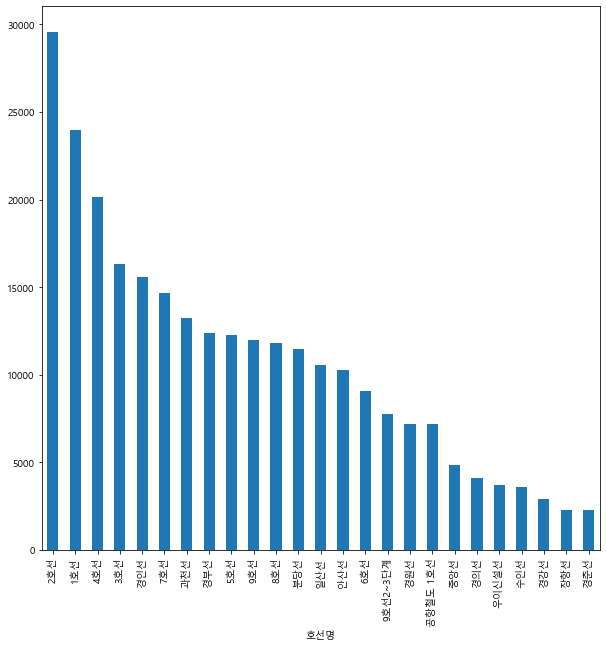

In [14]:
metro_line = metro_6_clean.groupby(['호선명']).mean().reset_index()
metro_line = metro_line.drop(columns={'사용월'}).set_index('호선명')
metro_line = metro_line.mean(axis=1).sort_values(ascending=False)


plt.figure(figsize=(10,10))
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus']==False
metro_line.plot(kind=('bar'))
plt.xticks(rotation = 90)
plt.show()

#### 3.2 특정 호선에서 역별 평균 승하차 인원 데이터 추출

In [15]:
line = '2호선'

metro = metro_6_clean.groupby(['호선명', '지하철역']).mean().reset_index()
metro_line_2 = metro[metro['호선명']==line]
metro_line_2

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
10,2호선,강남,202106.0,68.0,5.0,5634.0,10898.0,15798.0,49800.0,37686.0,...,27475.0,13686.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
11,2호선,강변(동서울터미널),202106.0,18.0,0.0,8295.0,2136.0,27343.0,21465.0,77995.0,...,5206.0,14835.0,4.0,403.0,1.0,0.0,0.0,0.0,0.0,0.0
12,2호선,건대입구,202106.0,176.0,7.0,14205.0,2139.0,20389.0,19701.0,52326.0,...,11703.0,22174.0,15.0,2442.0,0.0,0.0,0.0,0.0,0.0,0.0
13,2호선,교대(법원.검찰청),202106.0,18.0,1.0,2366.0,6923.0,11842.0,25344.0,24154.0,...,7841.0,8012.0,3.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2호선,구로디지털단지,202106.0,285.0,6.0,40159.0,5663.0,52880.0,22522.0,134048.0,...,7902.0,36652.0,0.0,34.0,1.0,1.0,0.0,0.0,0.0,0.0
15,2호선,구의(광진구청),202106.0,50.0,1.0,13662.0,1149.0,25627.0,9640.0,66711.0,...,4342.0,16515.0,6.0,1038.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2호선,낙성대(강감찬),202106.0,56.0,0.0,11657.0,1942.0,26007.0,8488.0,77510.0,...,4231.0,22418.0,6.0,1409.0,0.0,0.0,0.0,0.0,0.0,0.0
17,2호선,당산,202106.0,44.0,4.0,6576.0,3109.0,17276.0,12432.0,45774.0,...,4488.0,13350.0,1.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2호선,대림(구로구청),202106.0,412.0,20.0,34772.0,3267.0,29903.0,11601.0,65255.0,...,3662.0,17529.0,2.0,305.0,1.0,0.0,0.0,0.0,0.0,0.0
19,2호선,도림천,202106.0,0.0,0.0,263.0,320.0,1272.0,833.0,3182.0,...,151.0,669.0,3.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# 승차 인원만

metro_get_on = pd.DataFrame()
metro_get_on['지하철역'] = metro_line_2['지하철역']

for i in range(int((len(metro_6_clean.columns)-3)/2)):
    metro_get_on[metro_line_2.columns[3+2*i]] = metro_line_2[metro_line_2.columns[3+2*i]]
    
metro_get_on = metro_get_on.set_index('지하철역')
metro_get_on

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,68.0,5634.0,15798.0,37686.0,60412.0,47444.0,47162.0,63593.0,80198.0,96731.0,...,333597.0,202589.0,156402.0,212344.0,209363.0,27475.0,7.0,0.0,0.0,0.0
강변(동서울터미널),18.0,8295.0,27343.0,77995.0,106012.0,72448.0,50860.0,45540.0,45801.0,43734.0,...,58456.0,41062.0,30584.0,26850.0,20304.0,5206.0,4.0,1.0,0.0,0.0
건대입구,176.0,14205.0,20389.0,52326.0,88094.0,58146.0,33837.0,31591.0,36562.0,39017.0,...,79285.0,56745.0,57426.0,82927.0,81501.0,11703.0,15.0,0.0,0.0,0.0
교대(법원.검찰청),18.0,2366.0,11842.0,24154.0,33988.0,26824.0,25349.0,30985.0,34406.0,40404.0,...,146869.0,64550.0,49050.0,58044.0,53655.0,7841.0,3.0,0.0,0.0,0.0
구로디지털단지,285.0,40159.0,52880.0,134048.0,183174.0,109828.0,60920.0,54690.0,59463.0,61034.0,...,236175.0,109183.0,61807.0,56760.0,49254.0,7902.0,0.0,1.0,0.0,0.0
구의(광진구청),50.0,13662.0,25627.0,66711.0,111827.0,62341.0,32099.0,26917.0,27514.0,26932.0,...,41165.0,20148.0,15673.0,16519.0,15886.0,4342.0,6.0,0.0,0.0,0.0
낙성대(강감찬),56.0,11657.0,26007.0,77510.0,125167.0,76944.0,39332.0,33589.0,35687.0,34536.0,...,46497.0,26218.0,20440.0,20718.0,17056.0,4231.0,6.0,0.0,0.0,0.0
당산,44.0,6576.0,17276.0,45774.0,55760.0,31967.0,21461.0,20442.0,21169.0,21111.0,...,60343.0,26398.0,19514.0,22644.0,21194.0,4488.0,1.0,0.0,0.0,0.0
대림(구로구청),412.0,34772.0,29903.0,65255.0,91050.0,61110.0,33297.0,27642.0,30079.0,29912.0,...,52957.0,26990.0,18925.0,16643.0,12799.0,3662.0,2.0,1.0,0.0,0.0


In [17]:
#하차 인원만

metro_get_out = pd.DataFrame()
metro_get_out['지하철역'] = metro_line_2['지하철역']

for i in range(int((len(metro_6_clean.columns)-3)/2)):
    metro_get_out[metro_line_2.columns[4+2*i]] = metro_line_2[metro_line_2.columns[4+2*i]]
    
metro_get_out = metro_get_out.set_index('지하철역')
metro_get_out

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,5.0,10898.0,49800.0,150575.0,319617.0,310538.0,146907.0,104498.0,102420.0,121091.0,...,182063.0,99888.0,43968.0,35446.0,37493.0,13686.0,5.0,0.0,0.0,0.0
강변(동서울터미널),0.0,2136.0,21465.0,24424.0,46063.0,36699.0,34309.0,31714.0,35111.0,39567.0,...,108021.0,74801.0,47900.0,40695.0,48963.0,14835.0,403.0,0.0,0.0,0.0
건대입구,7.0,2139.0,19701.0,26069.0,61058.0,47220.0,36298.0,37929.0,46292.0,52863.0,...,144916.0,94289.0,49337.0,45034.0,50847.0,22174.0,2442.0,0.0,0.0,0.0
교대(법원.검찰청),1.0,6923.0,25344.0,58254.0,157982.0,137549.0,66113.0,51410.0,46562.0,53373.0,...,67556.0,40034.0,21605.0,19337.0,22696.0,8012.0,55.0,0.0,0.0,0.0
구로디지털단지,6.0,5663.0,22522.0,85822.0,268761.0,152613.0,57973.0,43450.0,44629.0,51260.0,...,162836.0,125661.0,76419.0,75719.0,89412.0,36652.0,34.0,1.0,0.0,0.0
구의(광진구청),1.0,1149.0,9640.0,15389.0,39614.0,22182.0,18572.0,18261.0,20806.0,23563.0,...,90738.0,64759.0,40868.0,38952.0,44587.0,16515.0,1038.0,0.0,0.0,0.0
낙성대(강감찬),0.0,1942.0,8488.0,20099.0,38509.0,30811.0,23826.0,21550.0,24991.0,25891.0,...,95878.0,81237.0,50982.0,49182.0,62294.0,22418.0,1409.0,0.0,0.0,0.0
당산,4.0,3109.0,12432.0,29933.0,78083.0,37339.0,18344.0,16913.0,18874.0,21079.0,...,73469.0,48000.0,29505.0,29942.0,33814.0,13350.0,205.0,0.0,0.0,0.0
대림(구로구청),20.0,3267.0,11601.0,24681.0,56423.0,34946.0,28143.0,28225.0,27936.0,29486.0,...,72361.0,52134.0,34930.0,44849.0,50327.0,17529.0,305.0,0.0,0.0,0.0


In [18]:
# 역 별 평균 승하차 인원 구함

mean_df = pd.DataFrame(index = metro_line_2['지하철역'])
mean_df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
mean_df['평균 하차 인원 수'] = metro_get_out.mean(axis=1).astype(int)

mean_df

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
강남,92076,90468
강변(동서울터미널),34935,34220
건대입구,39514,42484
교대(법원.검찰청),35937,40503
구로디지털단지,66141,66032
구의(광진구청),25803,25432
낙성대(강감찬),30847,29808
당산,21019,24151
대림(구로구청),27800,28518


### 3.3 평균 승하차 인원 수 내림 차순으로 시각화

In [19]:
mean_df.sort_values(by='평균 승차 인원 수', ascending=False)[:10]

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
강남,92076,90468
잠실(송파구청),75721,74981
신림,70767,68612
구로디지털단지,66141,66032
홍대입구,62778,65517
선릉,58101,51804
삼성(무역센터),55382,56196
신도림,55354,54550
서울대입구(관악구청),53321,52440


 2호선 기준 6월 한 달간 평균 승차 인원은 **강남 > 잠실 > 신림 > 구로디지털 > 홍대입구 > 선릉**

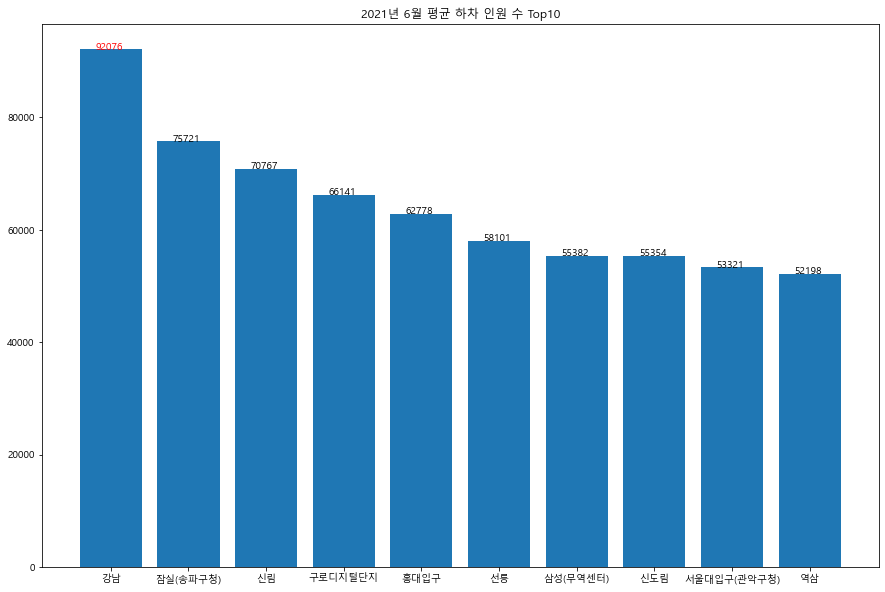

In [20]:
top10_on = mean_df.sort_values(by='평균 승차 인원 수', ascending=False)[:10]

plt.figure(figsize=(15,10))
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus']= False
plt.rc('font', size=10)

plt.bar(top10_on.index, top10_on['평균 승차 인원 수'])


# 막대 그래프 내에 값 넣기


for x,y in enumerate(list(top10_on['평균 승차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.2,y), color='red')
    else:
        plt.annotate(y, (x-0.2,y))
        
plt.title('2021년 6월 평균 하차 인원 수 Top10')
plt.show()

In [21]:
top_10_bottom = mean_df.sort_values(by='평균 하차 인원 수', ascending=False)[:10]
top_10_bottom

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
강남,92076,90468
잠실(송파구청),75721,74981
신림,70767,68612
구로디지털단지,66141,66032
홍대입구,62778,65517
역삼,52198,58045
삼성(무역센터),55382,56196
신도림,55354,54550
서울대입구(관악구청),53321,52440


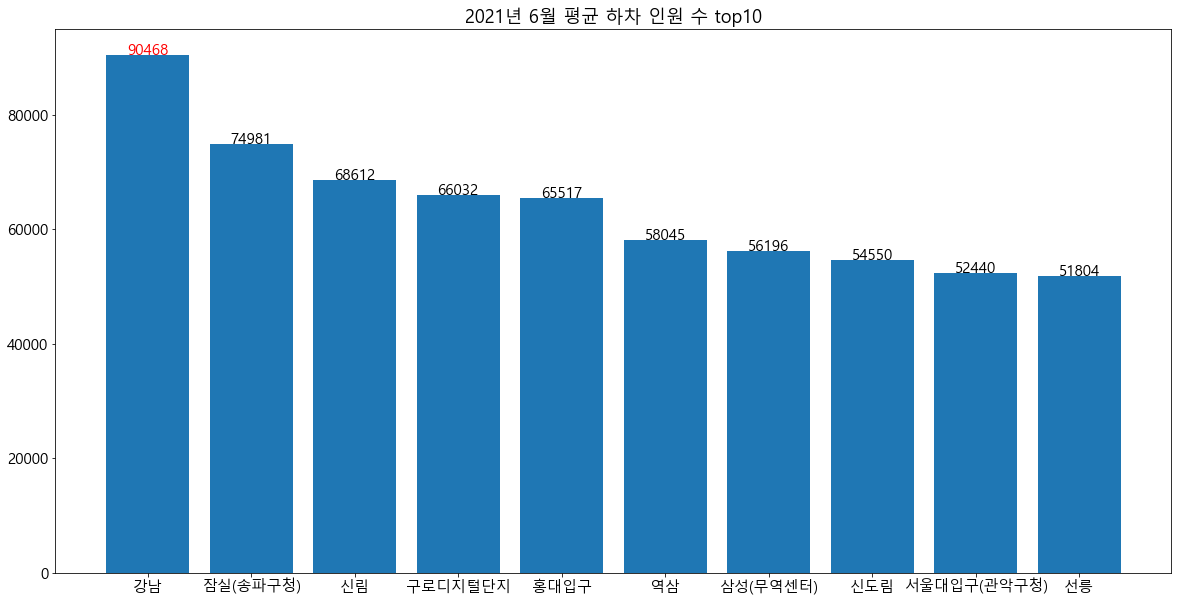

In [22]:
plt.figure(figsize=(20,10))
plt.rc('font', size=15)
plt.bar(top_10_bottom.index, top_10_bottom['평균 하차 인원 수'])

for x,y in enumerate(list(top_10_bottom['평균 하차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.2,y), color='red')
    else:
        plt.annotate(y, (x-0.2,y))
        
plt.title('2021년 6월 평균 하차 인원 수 top10')
plt.show()

퀴즈1. 6호선의 지하철 역 중에서 승차 인원수가 가장 많은 역명을 구하세요.

In [23]:
metro_6_clean.head(5)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,...,2811,8211,16,1434,1,1,0,0,0,0
1,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,...,1035,2589,4,1348,0,0,0,0,0,0
2,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,...,11581,8024,30,637,0,1,0,0,0,0
3,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,...,4390,1485,3,92,0,0,0,0,0,0
4,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,...,1952,5451,10,449,0,0,0,0,0,0


In [24]:
metro_line = metro_6_clean.groupby(['호선명','지하철역']).sum().reset_index()
metro_line_6 = metro_line[metro_line['호선명']=='6호선']
metro_line_6.head(5)

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
176,6호선,고려대(종암),202106,41,4,3769,899,7132,3956,20845,...,1623,6587,1,122,0,0,0,0,0,0
177,6호선,공덕,202106,114,2,4643,1766,7647,10036,20724,...,4463,5690,24,1615,0,0,0,0,0,0
178,6호선,광흥창(서강),202106,7,1,2658,1214,6802,4507,18523,...,1608,4107,1,102,0,0,0,0,0,0
179,6호선,구산,202106,1,0,5029,215,11342,2049,29522,...,790,4140,0,407,0,0,0,0,0,0
180,6호선,녹사평(용산구청),202106,12,0,860,400,1846,4167,4758,...,2228,1785,0,137,0,0,0,0,0,0


In [25]:
metro_6_df = pd.DataFrame()
metro_6_df['지하철역'] = metro_line_6['지하철역']
metro_6_df

,지하철역
176,고려대(종암)
177,공덕
178,광흥창(서강)
179,구산
180,녹사평(용산구청)
181,대흥(서강대앞)
182,독바위
183,돌곶이
184,동묘앞
185,디지털미디어시티


In [26]:
# 총 승차 인원만 

metro_6_on = pd.DataFrame()
metro_6_on['지하철역'] = metro_line_6['지하철역']

for i in range(int((len(metro_line_6)-3)/2)):
    metro_6_on[metro_line_6.columns[3+2*i]] = metro_line_6[metro_line_6.columns[3+2*i]]
               
metro_6_on = metro_6_on.set_index('지하철역')
metro_6_on

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,14시-15시 승차인원,15시-16시 승차인원,16시-17시 승차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원
지하철역,,,,,,,,,,,,,,,,,,
고려대(종암),41,3769,7132,20845,25062,13055,8823,8791,9686,11063,9236,10455,14318,19473,18192,8782,6527,7069
공덕,114,4643,7647,20724,28121,18342,15213,16745,18643,20191,20294,23963,29490,49843,86562,33672,24738,26720
광흥창(서강),7,2658,6802,18523,24132,14635,10990,11183,10477,10349,11350,11196,13187,19825,31203,13198,8551,7932
구산,1,5029,11342,29522,35106,17295,10961,9851,10528,9548,8475,8525,12550,9346,8769,5109,3928,3845
녹사평(용산구청),12,860,1846,4758,7852,5080,4065,4307,4944,5882,6291,7326,11119,13121,17950,10427,9383,12054
대흥(서강대앞),19,2006,5458,15004,19996,11584,8429,8235,10494,10298,9900,11629,14323,19331,24401,11983,8765,8979
독바위,2,1971,5083,13838,13383,6255,3900,3993,3747,3646,3194,3419,3478,3045,2705,1674,950,807
돌곶이,29,6121,13916,36163,39620,19350,12622,10647,11506,11812,11173,10334,11232,12171,12958,8942,5333,5147
동묘앞,116,4530,4662,8598,12551,10830,10055,12053,14600,14369,16033,18140,18968,21670,23245,12142,7855,7118


In [27]:
# 하차 인원만

metro_6_off = pd.DataFrame()
metro_6_off['지하철역'] = metro_line_6['지하철역']

for i in range(int((len(metro_line_6)-3)/2)):
    metro_6_off[metro_line_6.columns[4+2*i]] = metro_line_6[metro_line_6.columns[4+2*i]]
    
metro_6_off = metro_6_off.set_index('지하철역')
metro_6_off

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원
지하철역,,,,,,,,,,,,,,,,,,
고려대(종암),4,899,3956,10687,25975,11572,7380,7128,7355,9334,7750,8484,9876,12435,20719,17437,10363,10558
공덕,2,1766,10036,37229,97068,48896,21788,16948,17189,17322,16793,16598,19210,25339,37639,23703,13260,12679
광흥창(서강),1,1214,4507,16694,36554,16104,9547,8056,8346,9397,9119,9828,10860,13705,21451,16211,9642,8640
구산,0,215,2049,7109,7399,4975,4592,5876,6018,6958,7000,8333,10683,13024,19494,19110,9477,8417
녹사평(용산구청),0,400,4167,9942,18165,8081,6692,6083,7584,8263,7923,7925,9029,10363,14076,8746,4610,3623
대흥(서강대앞),0,868,4491,14288,31359,15648,10007,8620,10723,11241,9687,10250,11967,13971,21641,14225,8279,7643
독바위,0,256,982,1676,2994,3400,3384,2709,2901,2854,3029,3667,5007,6380,10973,10643,5948,5087
돌곶이,2,782,3073,5800,15772,9762,8330,7565,9084,9033,9332,11605,13714,18905,30487,26520,15256,12356
동묘앞,1,687,4348,9436,26699,19651,14208,14003,12676,13983,13656,13527,12649,12586,15325,11743,7420,7048


In [28]:
metro_6_df = metro_6_df.set_index('지하철역')
metro_6_df

""
지하철역
고려대(종암)
공덕
광흥창(서강)
구산
녹사평(용산구청)
대흥(서강대앞)
독바위
돌곶이
동묘앞


In [29]:
metro_6_df['총 승차 인원'] = metro_6_on.sum(axis=1)
metro_6_df['총 하차 인원'] = metro_6_off.sum(axis=1)

metro_6_df

,총 승차 인원,총 하차 인원
지하철역,,
고려대(종암),202319,181912
공덕,445665,433465
광흥창(서강),226198,209876
구산,199730,140729
녹사평(용산구청),127277,135672
대흥(서강대앞),200834,204908
독바위,75090,71890
돌곶이,239076,207378
동묘앞,217535,209646


In [30]:
metro_6_top10_on = metro_6_df.sort_values(by='총 승차 인원', ascending=False)[:10]
metro_6_top10_on

,총 승차 인원,총 하차 인원
지하철역,,
응암,466018,416921
공덕,445665,433465
망원,366359,401601
마포구청,365985,310960
디지털미디어시티,346031,357079
새절(신사),340502,289330
합정,328242,334976
석계,320746,301788
화랑대(서울여대입구),297353,213514


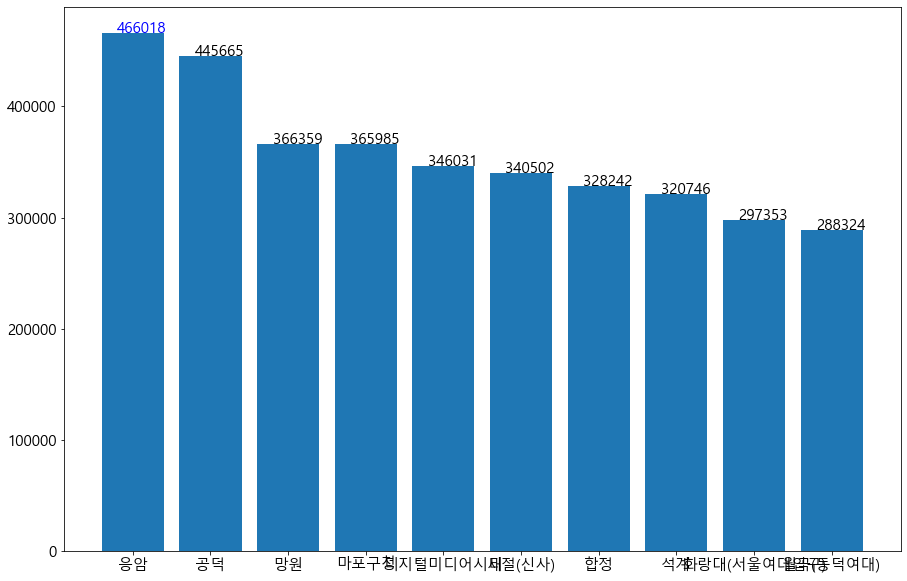

In [31]:
plt.figure(figsize=(15,10))

plt.bar(metro_6_top10_on.index, metro_6_top10_on['총 승차 인원'])

for x,y in enumerate(list(metro_6_top10_on['총 승차 인원'])):
    if x == 0:
        plt.annotate(y, (x-0.2,y), color='blue')
        
    else:
        plt.annotate(y, (x-0.2, y))
        
plt.show()

In [32]:
metro_6_top10_on.index[0]

'응암'

### 3.4 특정 호선의 혼잡 정도와 위치자표 데이터 병합

특정 호선의 지하철 역 마다 지도에 정보를 출력하기 위해서는 각 위치의 좌표정보가 필요함
카카오 API를 활용하여 csv 파일로 만듦

출처:
- https://developers.kakao.com/docs/latest/ko/local/dev-guide#search-by-keyword
- https://developers.kakao.com/docs/latest/ko/local/dev-guide#address-coord

In [33]:
os.listdir('./data')

['.ipynb_checkpoints',
 '서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_20210705.csv',
 '지하철 역 위치 좌표.csv']

In [34]:
subway_location = pd.read_csv('./data/지하철 역 위치 좌표.csv')
subway_location

,지하철역,주소,x좌표,y좌표
0,4.19민주묘지역,서울 강북구 우이동 72-182,37.649457,127.013506
1,가능역,경기 의정부시 가능동 197-1,37.747906,127.044358
2,가락시장역,서울 송파구 가락동 184-23,37.492915,127.118215
3,가산디지털단지역,서울 금천구 가산동 468-4,37.482414,126.882240
4,가양역,서울 강서구 가양동 14-61,37.561758,126.853997
...,...,...,...,...
574,회룡역,경기 의정부시 호원동 50-5,37.713908,127.046619
575,회현역,서울 중구 남창동 64-1,37.557688,126.976720
576,회현역,서울 중구 남창동 64-1,37.557688,126.976720
577,효창공원앞역,서울 용산구 효창동 80,37.539622,126.960984


- 특정 호선의 역 별 평균 승하차 인원 수와 지하철 역별 위치 자표 데이터 병합

In [35]:
def get_nums_and_location(line, metro_st):    
    
    # 특정 호선의 데이터 추출
    metro_line_n = metro_st[metro_st['호선명']==line]

    # 승차 인원만
    metro_on = pd.DataFrame()
    metro_on['지하철역'] = metro_line_n['지하철역']
    for on in range(int((len(metro_st.columns)-3)/2)):
        metro_on[metro_line_n.columns[3+2*on]] = metro_line_n[metro_line_n.columns[3+2*on]]
    metro_on = metro_on.set_index('지하철역')
    
    # 하차 인원만
    
    metro_off = pd.DataFrame()
    metro_off['지하철역'] = metro_line_n['지하철역']
    for off in range(int((len(metro_st.columns)-3)/2)):
        metro_off[metro_line_n.columns[4+2*off]] = metro_line_n[metro_line_n.columns[4+2*off]]
    metro_off = metro_off.set_index('지하철역')
    
    # 역 별 승/하차 평균 인원
    
    df = pd.DataFrame(index= metro_line_n['지하철역'])
    df['평균 승차 인원 수'] = metro_on.mean(axis=1).astype(int)
    df['평균 하차 인원 수'] = metro_off.mean(axis=1).astype(int)
    
    # 지하철 역이 동일하도록 설정
    
    temp = []
    df = df.reset_index()
    for name in df['지하철역']:
        temp.append(name.split('(')[0]+'역')
    df['지하철역'] = temp
    
    # 지하철역 명을 기준으로 두 테이블 병합
    
    df = df.merge(subway_location, left_on='지하철역', right_on='지하철역')
    
    return df
    

In [36]:
get_nums_and_location('6호선', metro_line)

,지하철역,평균 승차 인원 수,평균 하차 인원 수,주소,x좌표,y좌표
0,고려대역,8761,8350,서울 성북구 종암동 29-18,37.589679,127.035926
1,고려대역,8761,8350,서울 성북구 종암동 29-18,37.589679,127.035926
2,공덕역,19783,19001,서울 마포구 공덕동 423-29,37.544487,126.951195
3,광흥창역,9772,9385,서울 마포구 창전동 145-17,37.547426,126.932477
4,광흥창역,9772,9385,서울 마포구 창전동 145-17,37.547426,126.932477
5,구산역,8504,6408,서울 은평구 구산동 1,37.611212,126.917182
6,녹사평역,5997,5918,서울 용산구 용산동4가 4,37.534446,126.985525
7,대흥역,8862,9121,서울 마포구 대흥동 128-1,37.547730,126.942379
8,대흥역,8862,9121,서울 마포구 대흥동 128-1,37.547730,126.942379
9,독바위역,3167,3376,서울 은평구 불광동 13-33,37.618377,126.932857


### 3.5 특정 호선의 혼잡 정도를 지도에 출력

- 지도 출력 라이브러리 : folium 사용

In [37]:
import folium

In [38]:
# 특정 위도, 경도 중심 OpenStreetMap 출력

mapping = folium.Map(location= [37.529622, 126.984307], zoom_start=13.8)
mapping

- 특정 호선의 역별 평균 승차 인원수 원형 마커 지도 출력

In [39]:
subway_location

,지하철역,주소,x좌표,y좌표
0,4.19민주묘지역,서울 강북구 우이동 72-182,37.649457,127.013506
1,가능역,경기 의정부시 가능동 197-1,37.747906,127.044358
2,가락시장역,서울 송파구 가락동 184-23,37.492915,127.118215
3,가산디지털단지역,서울 금천구 가산동 468-4,37.482414,126.882240
4,가양역,서울 강서구 가양동 14-61,37.561758,126.853997
...,...,...,...,...
574,회룡역,경기 의정부시 호원동 50-5,37.713908,127.046619
575,회현역,서울 중구 남창동 64-1,37.557688,126.976720
576,회현역,서울 중구 남창동 64-1,37.557688,126.976720
577,효창공원앞역,서울 용산구 효창동 80,37.539622,126.960984


In [40]:
rail = '6호선'
df = get_nums_and_location(rail, metro_line_6)


# 서울 중심에 위치하는 명동역의 위도와 경도 중심으로 지도 출력

latitude = subway_location[subway_location['지하철역']=='명동역']['x좌표']
longitude = subway_location[subway_location['지하철역']=='명동역']['y좌표']
mapping = folium.Map(location = [latitude, longitude], zoom_start=12)

mapping

In [41]:
# 각 지하철 역의 위치별로 원형 마커

for i in df.index:
    marker = folium.CircleMarker([df['x좌표'][i], df['y좌표'][i]],
                                 radius = (df['평균 승차 인원 수'][i]+1)/3000, # 인원 수가 0일 때 계산 오류 보정
                                 popup = [df['지하철역'][i], df['평균 승차 인원 수'][i]],
                                 color= 'blue',
                                 fill_color='blue')
    marker.add_to(mapping)
    
mapping

**퀴즈2. 강남역의 x좌표(위도)를 구하세요.**

In [42]:
rail = '2호선'
df2 = get_nums_and_location(rail, metro_line)

df2

,지하철역,평균 승차 인원 수,평균 하차 인원 수,주소,x좌표,y좌표
0,강남역,92076,90468,서울 강남구 역삼동 858,37.497057,127.028181
1,강변역,34935,34220,서울 광진구 구의동 546-6,37.535383,127.094545
2,강변역,34935,34220,서울 광진구 구의동 546-6,37.535383,127.094545
3,건대입구역,39514,42484,서울 광진구 화양동 7-3,37.540816,127.069031
4,교대역,35937,40503,서울 서초구 서초동 1748-4,37.494869,127.017321
...,...,...,...,...,...,...
57,충정로역,10890,11431,서울 서대문구 충정로3가 319-1,37.559550,126.963876
58,충정로역,10890,11431,서울 서대문구 충정로3가 319-1,37.559550,126.963876
59,한양대역,8680,9327,서울 성동구 행당동 산 17,37.555578,127.043584
60,합정역,35460,37319,서울 마포구 서교동 393,37.550115,126.914638


In [43]:
df2[df2['지하철역']=='강남역']['x좌표'][0]

37.4970572543978